# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


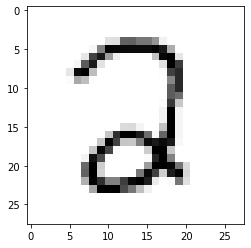

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.20465077109517296
train accuracy is: 0.8030378901685862, test accuracy is 0.8099798387096774


Epoch 10 Loss 0.05359099350340652
train accuracy is: 0.9441662493740611, test accuracy is 0.9566532258064516


Epoch 20 Loss 0.03910202710381409
train accuracy is: 0.956518110499082, test accuracy is 0.9647177419354839


Epoch 30 Loss 0.03327121822219422
train accuracy is: 0.9620263728926723, test accuracy is 0.969758064516129


Epoch 40 Loss 0.029841609440700186
train accuracy is: 0.9654481722583875, test accuracy is 0.9717741935483871


Epoch 50 Loss 0.027434575957502653
train accuracy is: 0.9680353864129527, test accuracy is 0.9722782258064516


Epoch 60 Loss 0.025554341821661598
train accuracy is: 0.9697880153563679, test accuracy is 0.9732862903225806


Epoch 70 Loss 0.024034620651434534
train accuracy is: 0.971290268736438, test accuracy is 0.9742943548387096


Epoch 80 Loss 0.022729096756968464
train accuracy is: 0.9730428976798531, test accuracy is 0.9747983870967742


Epoch 90 Loss 0.021623328520181877
train accuracy is: 0.9742113169754631, test accuracy is 0.9747983870967742


Epoch 100 Loss 0.02062871740446197
train accuracy is: 0.9757135703555333, test accuracy is 0.9763104838709677


Epoch 110 Loss 0.019679379234582253
train accuracy is: 0.9769654481722584, test accuracy is 0.9753024193548387


Epoch 120 Loss 0.018885470821173932
train accuracy is: 0.9783007845100985, test accuracy is 0.9758064516129032


Epoch 130 Loss 0.018110799498446285
train accuracy is: 0.9796361208479386, test accuracy is 0.9753024193548387


Epoch 140 Loss 0.017397655408715497
train accuracy is: 0.9805541645802036, test accuracy is 0.9778225806451613


Epoch 150 Loss 0.016732292595564986
train accuracy is: 0.9815556668335838, test accuracy is 0.9778225806451613


Epoch 160 Loss 0.0161161579816259
train accuracy is: 0.9827240861291938, test accuracy is 0.9783266129032258


Epoch 170 Loss 0.015529343993982495
train accuracy is: 0.9833082957769989, test accuracy is 0.9793346774193549


Epoch 180 Loss 0.015001792521504298
train accuracy is: 0.984727090635954, test accuracy is 0.9798387096774194


Epoch 190 Loss 0.014500377444252057
train accuracy is: 0.9853947588048739, test accuracy is 0.9798387096774194


Epoch 200 Loss 0.014035926729857925
train accuracy is: 0.9859789684526791, test accuracy is 0.9803427419354839


Epoch 210 Loss 0.013591759348777713
train accuracy is: 0.986730095142714, test accuracy is 0.9818548387096774


Epoch 220 Loss 0.013179738843893092
train accuracy is: 0.9871473877482891, test accuracy is 0.9818548387096774


Epoch 230 Loss 0.01278867830218508
train accuracy is: 0.9875646803538641, test accuracy is 0.9818548387096774


Epoch 240 Loss 0.012415540054755782
train accuracy is: 0.9878985144383241, test accuracy is 0.9818548387096774


0.02518523507261368

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2542054236354336
train accuracy is: 0.6338674678684694, test accuracy is 0.6522177419354839


Epoch 10 Loss 0.10712799314095352
train accuracy is: 0.899766316140878, test accuracy is 0.9067540322580645


Epoch 20 Loss 0.08112391011752786
train accuracy is: 0.9255549991654148, test accuracy is 0.9324596774193549


Epoch 30 Loss 0.06937829067390686
train accuracy is: 0.9349023535302955, test accuracy is 0.9435483870967742


Epoch 40 Loss 0.06243112474423802
train accuracy is: 0.9399933233183108, test accuracy is 0.9495967741935484


Epoch 50 Loss 0.057746262013525396
train accuracy is: 0.942914371557336, test accuracy is 0.952116935483871


Epoch 60 Loss 0.05432880805287406
train accuracy is: 0.9451677516274412, test accuracy is 0.9536290322580645


Epoch 70 Loss 0.051696700726083455
train accuracy is: 0.9470872976130863, test accuracy is 0.9551411290322581


Epoch 80 Loss 0.049595906552828126
train accuracy is: 0.9486730095142714, test accuracy is 0.9576612903225806


Epoch 90 Loss 0.04786712433511702
train accuracy is: 0.9500083458521115, test accuracy is 0.9586693548387096


Epoch 100 Loss 0.046414002767727655
train accuracy is: 0.9515105992321816, test accuracy is 0.9601814516129032


Epoch 110 Loss 0.04516971131260646
train accuracy is: 0.9520948088799867, test accuracy is 0.9611895161290323


Epoch 120 Loss 0.04409011439847734
train accuracy is: 0.9528459355700217, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.04313972322521248
train accuracy is: 0.9538474378234018, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.042295356889887246
train accuracy is: 0.9552662326823569, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04153836371250321
train accuracy is: 0.9558504423301619, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04085440451285781
train accuracy is: 0.9563511934568519, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.040233212274920306
train accuracy is: 0.956518110499082, test accuracy is 0.9642137096774194


Epoch 180 Loss 0.03966442406923945
train accuracy is: 0.957185778668002, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.039141112859234106
train accuracy is: 0.957519612752462, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.03865810165679368
train accuracy is: 0.9579369053580371, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03820942371211542
train accuracy is: 0.9589384076114171, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.037792445417091834
train accuracy is: 0.9595226172592222, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03740224403489078
train accuracy is: 0.9597729928225672, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03703703045154731
train accuracy is: 0.9602737439492572, test accuracy is 0.9662298387096774


0.026761267258821515

### Comparing results of NN and LR

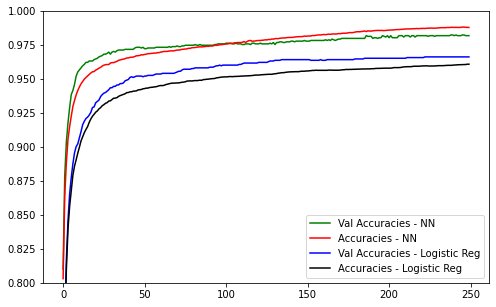

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

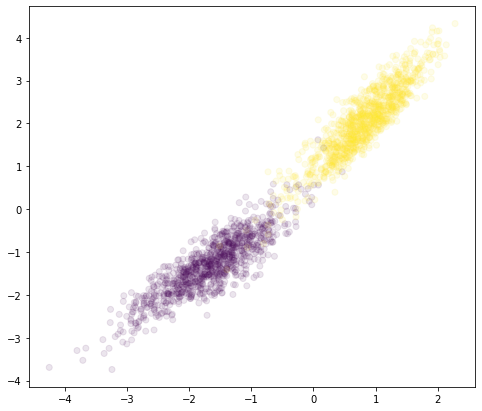

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

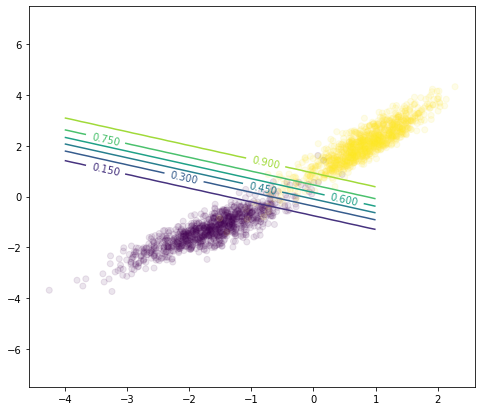

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );